# Compare Measurements from Simulation and Real Robot

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

In [28]:
def normalize(csvfiles, fields, names, output_img=None):
    #fields = ['time', 'yaw', 'pitch', 'roll', 'x', 'y', 'z', 'f1', 't1', 'f2', 't2', 'f3', 't3', 'f4', 't4']
    data = {f:[] for f in fields}
    fig, ax = plt.subplots(3,2, sharex = True, figsize =(18,12))
    for i, csvfile in enumerate(csvfiles):
        df = pd.read_csv(csvfile,skiprows=[],delim_whitespace=False, header=None)
        df.columns = fields
        #df['time'] = df['time'] * - 1. # reverse negative sign of time
        for j in xrange(6):
            field = fields[j]

            # preprocessing
            df[field] = signal.medfilt(df[field],15)    # reduce noise
            #df[field] = df[field][30:]                 # abandon initaial
            
            df[field] = df[field] - np.mean(df[field][30:-30]) # normalize
            df[field] /= np.std(df[field][30:-30])

            # store data
            data[field].append(df[field])
            ax[j%3,j/3].plot(df[field][5:-5], label=names[i])
            ax[j%3,j/3].set_title(field, fontsize=30)
            ax[j%3,j/3].set_xlabel('step', fontsize=20)
            
            #ax[j%3,j/3].legend(loc=4)
    for i in xrange(3):
        ax[i,0].set_ylabel('rad', fontsize=20)
        ax[i,1].set_ylabel('$m/s^2$', fontsize=20)
        ax[i,0].grid()
        ax[i,1].grid()
    if output_img is not None:
        plt.tight_layout()
        plt.savefig(output_img)

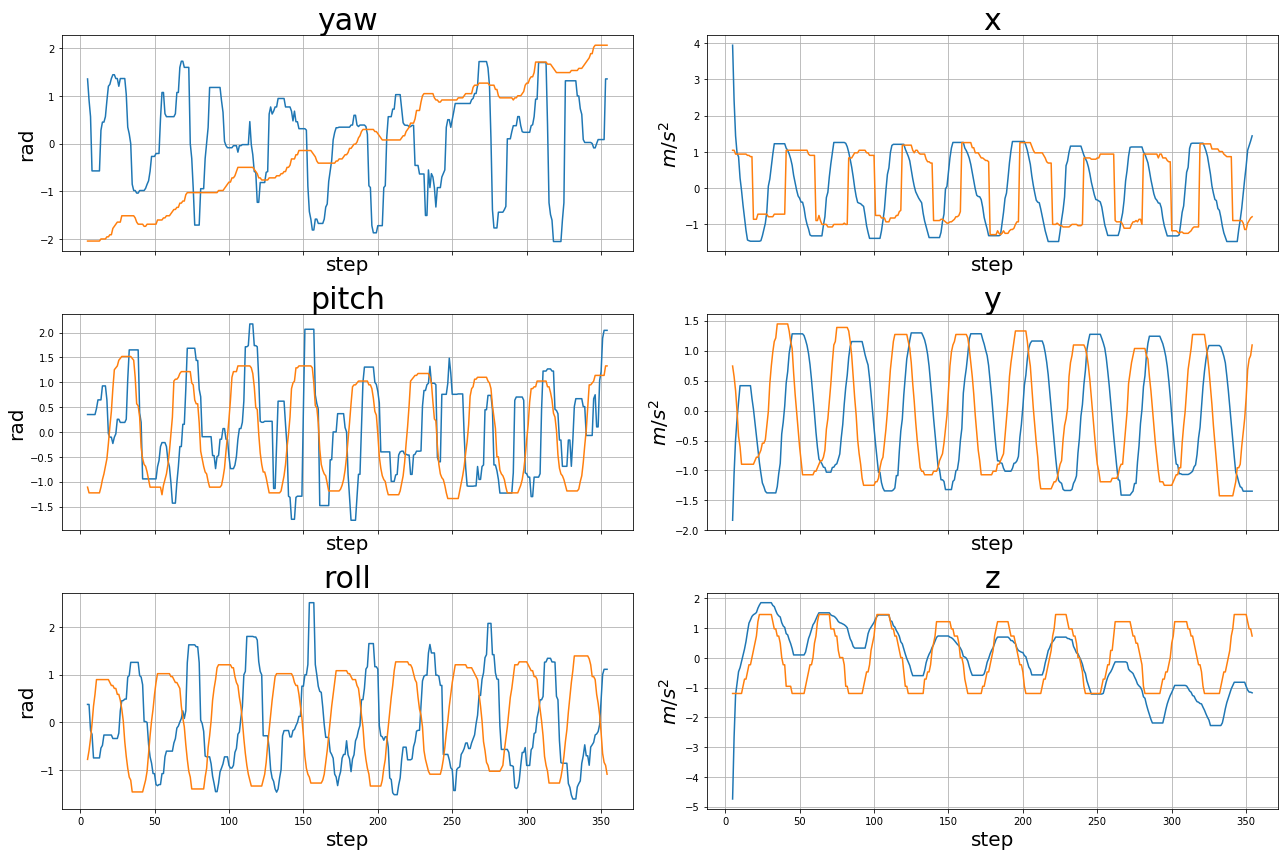

In [29]:
#csvfiles = ['output.csv', 'walk.csv']
csvfiles = ['output_stand0709.csv', 'stand_0709.csv']
names = ['simulated', 'real']
fields = ['yaw', 'pitch', 'roll', 'x', 'y', 'z']
normalize(csvfiles, fields, names, 'images/compare_stand.jpg')